Importing necessary modules

In [30]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import normalization

Importing the data and making new dataframe data_clustering

In [31]:
data = pd.read_csv("Ecommerce Customers.csv")
#print(data.head(5))

data_clustering = data[["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent"]]
print(data_clustering.head(5))

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092  


Scaling the data

In [32]:
scaled = StandardScaler(data_clustering)
#print(data_clustering.head(5))

Elbow criteria

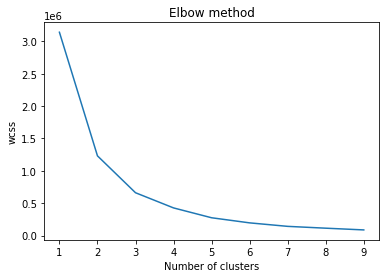

In [33]:
# wcss => within cluster sum of squares
# .inertia_ => Sum of squared distances of samples to their closest cluster center
wcss = []
for i in range(1,10):
    km = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=30)
    km.fit(data_clustering)
    wcss.append(km.inertia_)

plt.plot(range(1,10), wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

Runing the Kmeans algorithm

In [34]:
clustering = KMeans(n_clusters=5, random_state=20, max_iter=300)
data_clustering["clusters"] = clustering.fit_predict(data_clustering)

#print(data_clustering.head(10))

Dimension reduction for visualisation

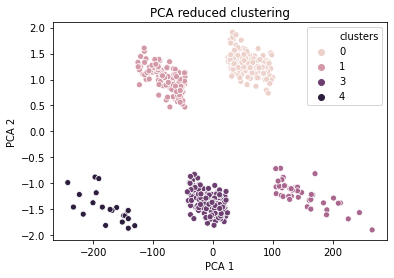

In [35]:
reduced_data = PCA(n_components= 2).fit_transform(data_clustering)
results = pd.DataFrame(reduced_data, columns= ["pca1","pca2"])

sns.scatterplot(x="pca1",y="pca2",hue=data_clustering["clusters"], data=results)
plt.title('PCA reduced clustering')
plt.ylabel('PCA 2')
plt.xlabel('PCA 1')
plt.show()

Finding the cluster features 

In [36]:
counter = 0

cluster_0 = []
cluster_1 = []
cluster_2 = []
cluster_3 = []
cluster_4 = []


for x in data_clustering["clusters"]:
    if x == 0:
        cluster_0.append(data_clustering.iloc[counter,:])
        counter += 1
    elif x == 1:
        cluster_1.append(data_clustering.iloc[counter,:])
        counter += 1
    elif x == 2:
        cluster_2.append(data_clustering.iloc[counter,:])
        counter += 1
    elif x == 3:
        cluster_3.append(data_clustering.iloc[counter,:])
        counter += 1
    elif x == 4:
        cluster_4.append(data_clustering.iloc[counter,:])
        counter += 1
    else:
        counter += 1
        pass

cluster_0 = pd.DataFrame(cluster_0)
cluster_1 = pd.DataFrame(cluster_1)
cluster_2 = pd.DataFrame(cluster_2)
cluster_3 = pd.DataFrame(cluster_3)
cluster_4 = pd.DataFrame(cluster_4)


#print(cluster_0.describe())
#print(cluster_1.describe())
#print(cluster_2.describe())
#print(cluster_3.describe())
#print(cluster_4.describe())

2-Dimensional Kmeans Visualisation

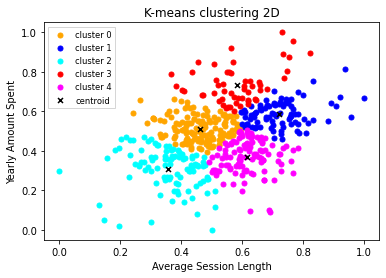

In [37]:
#Avg. Session Length (0), Yearly Amount Spent(4)

data_clustering_num = normalization.normalized_dataframe
#print(data_clustering_num.head(5))
x = data_clustering_num.iloc[:,[0,4]].values

kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=30, random_state=0)
clusters = kmeans.fit_predict(x)

plt.scatter(x[clusters == 0, 0], x[clusters == 0, 1], s = 25, c = 'orange', label="cluster 0")
plt.scatter(x[clusters == 1, 0], x[clusters == 1, 1], s = 25, c = "blue", label="cluster 1")
plt.scatter(x[clusters == 2, 0], x[clusters == 2, 1], s = 25, c = 'cyan', label="cluster 2")
plt.scatter(x[clusters == 3, 0], x[clusters == 3, 1], s = 25, c = 'red', label="cluster 3")
plt.scatter(x[clusters == 4, 0], x[clusters == 4, 1], s = 25, c = 'magenta', label="cluster 4")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 25, c = 'black' , label = 'centroid', marker="x")
plt.xlabel("Average Session Length")
plt.ylabel("Yearly Amount Spent")
plt.title('K-means clustering 2D' )
plt.legend(fancybox=False, fontsize='small')
plt.show()

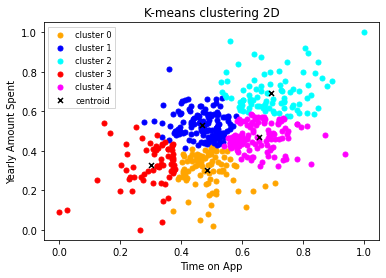

In [38]:
# Time on App (1), Yearly Amount Spent (4)


data_clustering_num = normalization.normalized_dataframe
#print(data_clustering_num.head(5))
x = data_clustering_num.iloc[:,[1,4]].values

kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=30, random_state=0)
clusters = kmeans.fit_predict(x)

plt.scatter(x[clusters == 0, 0], x[clusters == 0, 1], s = 25, c = 'orange', label="cluster 0")
plt.scatter(x[clusters == 1, 0], x[clusters == 1, 1], s = 25, c = "blue", label="cluster 1")
plt.scatter(x[clusters == 2, 0], x[clusters == 2, 1], s = 25, c = 'cyan', label="cluster 2")
plt.scatter(x[clusters == 3, 0], x[clusters == 3, 1], s = 25, c = 'red', label="cluster 3")
plt.scatter(x[clusters == 4, 0], x[clusters == 4, 1], s = 25, c = 'magenta', label="cluster 4")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 25, c = 'black' , label = 'centroid', marker="x")
plt.xlabel("Time on App")
plt.ylabel("Yearly Amount Spent")
plt.title('K-means clustering 2D' )
plt.legend(fancybox=False, fontsize='small')
plt.show()

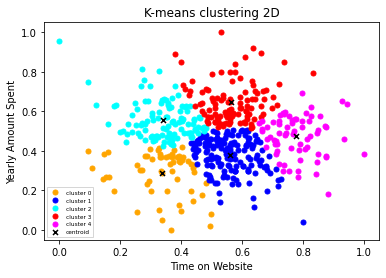

In [39]:
# 'Time on Website'(2),'Yearly Amount Spent' (4)

data_clustering_num = normalization.normalized_dataframe
#print(data_clustering_num.head(5))
x = data_clustering_num.iloc[:,[2,4]].values

kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=30, random_state=0)
clusters = kmeans.fit_predict(x)

plt.scatter(x[clusters == 0, 0], x[clusters == 0, 1], s = 25, c = 'orange', label="cluster 0")
plt.scatter(x[clusters == 1, 0], x[clusters == 1, 1], s = 25, c = "blue", label="cluster 1")
plt.scatter(x[clusters == 2, 0], x[clusters == 2, 1], s = 25, c = 'cyan', label="cluster 2")
plt.scatter(x[clusters == 3, 0], x[clusters == 3, 1], s = 25, c = 'red', label="cluster 3")
plt.scatter(x[clusters == 4, 0], x[clusters == 4, 1], s = 25, c = 'magenta', label="cluster 4")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 25, c = 'black' , label = 'centroid', marker="x")
plt.xlabel("Time on Website")
plt.ylabel("Yearly Amount Spent")
plt.title('K-means clustering 2D' )
plt.legend(fancybox=False, fontsize='xx-small', loc=3, ncol=1)
plt.show()


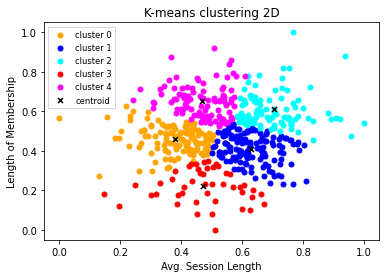

In [40]:
#Avg. Session Lentgh (0) Length of Membership (3)

data_clustering_num = normalization.normalized_dataframe
#print(data_clustering_num.head(5))
x = data_clustering_num.iloc[:,[0,3]].values

kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=30, random_state=0)
clusters = kmeans.fit_predict(x)

plt.scatter(x[clusters == 0, 0], x[clusters == 0, 1], s = 25, c = 'orange', label="cluster 0")
plt.scatter(x[clusters == 1, 0], x[clusters == 1, 1], s = 25, c = "blue", label="cluster 1")
plt.scatter(x[clusters == 2, 0], x[clusters == 2, 1], s = 25, c = 'cyan', label="cluster 2")
plt.scatter(x[clusters == 3, 0], x[clusters == 3, 1], s = 25, c = 'red', label="cluster 3")
plt.scatter(x[clusters == 4, 0], x[clusters == 4, 1], s = 25, c = 'magenta', label="cluster 4")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 25, c = 'black' , label = 'centroid', marker="x")
plt.xlabel("Avg. Session Length")
plt.ylabel("Length of Membership")
plt.title('K-means clustering 2D' )
plt.legend(fancybox=False, fontsize='small')
plt.show()
   

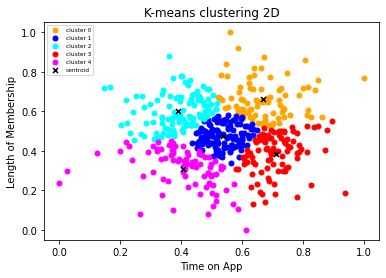

In [41]:
#Time on App (1), Length of Membership (4)

data_clustering_num = normalization.normalized_dataframe
#print(data_clustering_num.head(5))
x = data_clustering_num.iloc[:,[1,3]].values

kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=30, random_state=0)
clusters = kmeans.fit_predict(x)

plt.scatter(x[clusters == 0, 0], x[clusters == 0, 1], s = 25, c = 'orange', label="cluster 0")
plt.scatter(x[clusters == 1, 0], x[clusters == 1, 1], s = 25, c = "blue", label="cluster 1")
plt.scatter(x[clusters == 2, 0], x[clusters == 2, 1], s = 25, c = 'cyan', label="cluster 2")
plt.scatter(x[clusters == 3, 0], x[clusters == 3, 1], s = 25, c = 'red', label="cluster 3")
plt.scatter(x[clusters == 4, 0], x[clusters == 4, 1], s = 25, c = 'magenta', label="cluster 4")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 25, c = 'black' , label = 'centroid', marker="x")
plt.xlabel("Time on App")
plt.ylabel("Length of Membership")
plt.title('K-means clustering 2D' )
plt.legend(fancybox=False, fontsize='xx-small', loc=2)
plt.show()

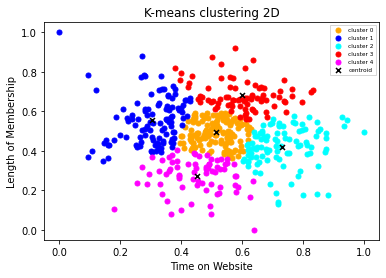

In [42]:
#"Time on Website" (2)Length of Membership (4)

data_clustering_num = normalization.normalized_dataframe
#print(data_clustering_num.head(5))
x = data_clustering_num.iloc[:,[2,3]].values

kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=30, random_state=0)
clusters = kmeans.fit_predict(x)

plt.scatter(x[clusters == 0, 0], x[clusters == 0, 1], s = 25, c = 'orange', label="cluster 0")
plt.scatter(x[clusters == 1, 0], x[clusters == 1, 1], s = 25, c = "blue", label="cluster 1")
plt.scatter(x[clusters == 2, 0], x[clusters == 2, 1], s = 25, c = 'cyan', label="cluster 2")
plt.scatter(x[clusters == 3, 0], x[clusters == 3, 1], s = 25, c = 'red', label="cluster 3")
plt.scatter(x[clusters == 4, 0], x[clusters == 4, 1], s = 25, c = 'magenta', label="cluster 4")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 25, c = 'black' , label = 'centroid', marker="x")
plt.xlabel("Time on Website")
plt.ylabel("Length of Membership")
plt.title('K-means clustering 2D' )
plt.legend(fancybox=False, fontsize='xx-small')
plt.show()


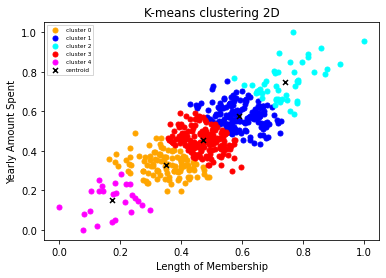

In [43]:
#Length of Membership (3) & Yearly Amount Spent(4) 
data_clustering_num = normalization.normalized_dataframe
#print(data_clustering_num.head(5))
x = data_clustering_num.iloc[:,[3,4]].values

kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=30, random_state=0)
clusters = kmeans.fit_predict(x)

plt.scatter(x[clusters == 0, 0], x[clusters == 0, 1], s = 25, c = 'orange', label="cluster 0")
plt.scatter(x[clusters == 1, 0], x[clusters == 1, 1], s = 25, c = "blue", label="cluster 1")
plt.scatter(x[clusters == 2, 0], x[clusters == 2, 1], s = 25, c = 'cyan', label="cluster 2")
plt.scatter(x[clusters == 3, 0], x[clusters == 3, 1], s = 25, c = 'red', label="cluster 3")
plt.scatter(x[clusters == 4, 0], x[clusters == 4, 1], s = 25, c = 'magenta', label="cluster 4")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 25, c = 'black' , label = 'centroid', marker="x")
plt.xlabel("Length of Membership")
plt.ylabel("Yearly Amount Spent")
plt.title('K-means clustering 2D' )
plt.legend(fancybox=False, fontsize='xx-small')
plt.show()